# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43#len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

import os
import datetime
work_dir = os.getcwd()

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [80]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import csv

# get sign names
f = open('signnames.csv', 'r')
reader = csv.reader(f)
signs_dict = dict(reader)
f.close()

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

def print_image_from_set(image, label):
    print('Class %i "%s"' % (label, signs_dict[str(label)]))
    fig = plt.figure(figsize = (1, 1))
    if image.shape[-1] == 1:
        plt.imshow(image.squeeze(), cmap = 'gray')
    else:
        plt.imshow(image)

def print_set_stats(X, y, show_pics = True, show_histogram = True, header = None):
    if header != None:
        print(header)
    u_id, u_indx, u_cnt = np.unique(y, return_index=True, return_counts=True)
    if show_pics:
        for id, indx, cnt in zip(u_id, u_indx, u_cnt):
            print('Class %i "%s" has %i samples' % (id, signs_dict[str(id)], cnt))
            fig = plt.figure(figsize = (6, 1))
            indx_sample = random.sample(range(indx, indx + cnt), 10)
            for i in range(10):

                axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
                if X[indx_sample[i]].shape[-1] == 1:
                    axis.imshow(X[indx_sample[i]].squeeze(), cmap = 'gray')
                else:
                    axis.imshow(X[indx_sample[i]])
            plt.show()
    if show_histogram:
        plt.bar(np.arange(n_classes), u_cnt)
        plt.xlabel('Class')
        plt.ylabel('Number of samples')
        plt.show()




Training data set stats
Class 0 "Speed limit (20km/h)" has 210 samples


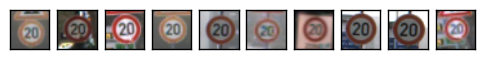

Class 1 "Speed limit (30km/h)" has 2220 samples


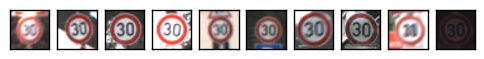

Class 2 "Speed limit (50km/h)" has 2250 samples


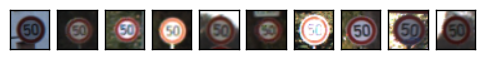

Class 3 "Speed limit (60km/h)" has 1410 samples


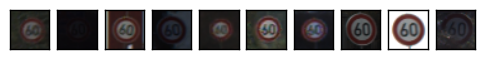

Class 4 "Speed limit (70km/h)" has 1980 samples


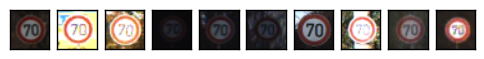

Class 5 "Speed limit (80km/h)" has 1860 samples


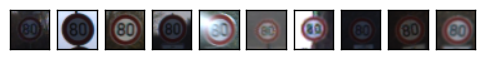

Class 6 "End of speed limit (80km/h)" has 420 samples


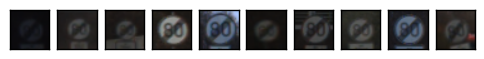

Class 7 "Speed limit (100km/h)" has 1440 samples


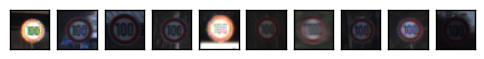

Class 8 "Speed limit (120km/h)" has 1410 samples


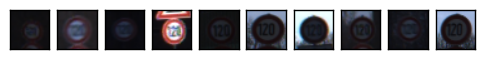

Class 9 "No passing" has 1470 samples


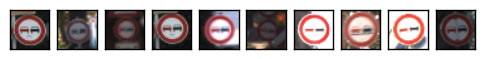

Class 10 "No passing for vehicles over 3.5 metric tons" has 2010 samples


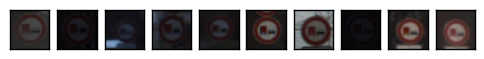

Class 11 "Right-of-way at the next intersection" has 1320 samples


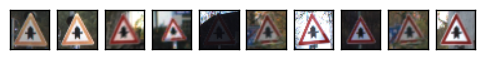

Class 12 "Priority road" has 2100 samples


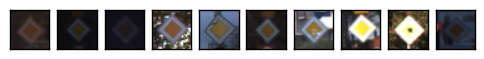

Class 13 "Yield" has 2160 samples


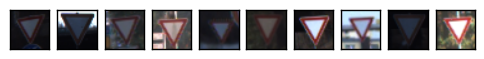

Class 14 "Stop" has 780 samples


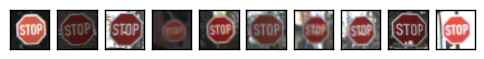

Class 15 "No vehicles" has 630 samples


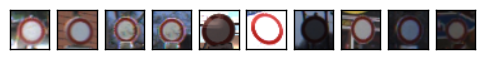

Class 16 "Vehicles over 3.5 metric tons prohibited" has 420 samples


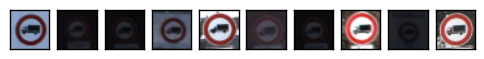

Class 17 "No entry" has 1110 samples


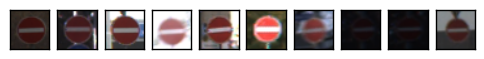

Class 18 "General caution" has 1200 samples


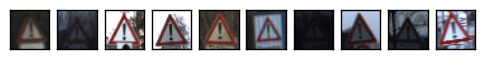

Class 19 "Dangerous curve to the left" has 210 samples


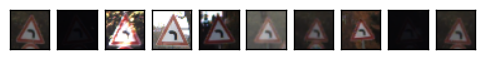

Class 20 "Dangerous curve to the right" has 360 samples


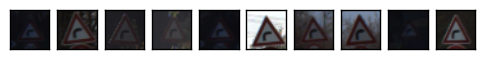

Class 21 "Double curve" has 330 samples


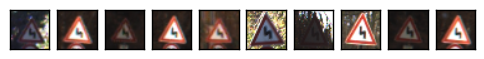

Class 22 "Bumpy road" has 390 samples


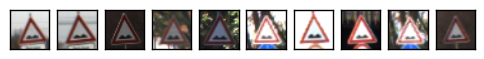

Class 23 "Slippery road" has 510 samples


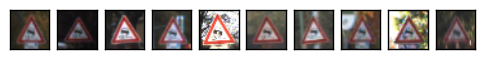

Class 24 "Road narrows on the right" has 270 samples


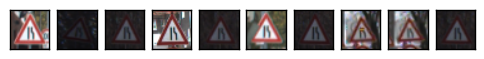

Class 25 "Road work" has 1500 samples


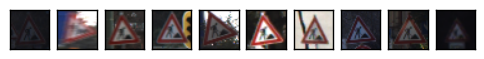

Class 26 "Traffic signals" has 600 samples


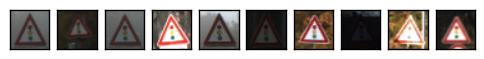

Class 27 "Pedestrians" has 240 samples


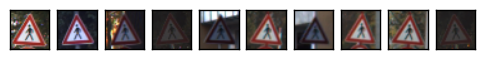

Class 28 "Children crossing" has 540 samples


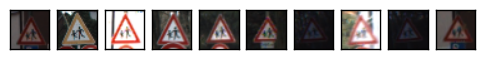

Class 29 "Bicycles crossing" has 270 samples


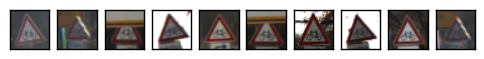

Class 30 "Beware of ice/snow" has 450 samples


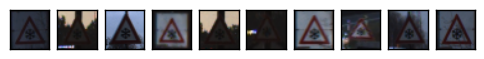

Class 31 "Wild animals crossing" has 780 samples


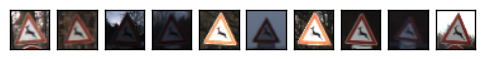

Class 32 "End of all speed and passing limits" has 240 samples


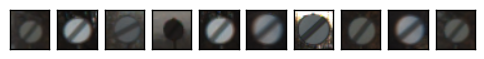

Class 33 "Turn right ahead" has 689 samples


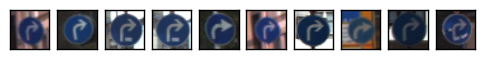

Class 34 "Turn left ahead" has 420 samples


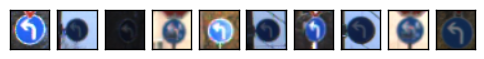

Class 35 "Ahead only" has 1200 samples


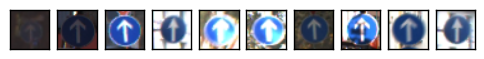

Class 36 "Go straight or right" has 390 samples


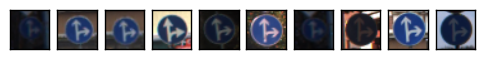

Class 37 "Go straight or left" has 210 samples


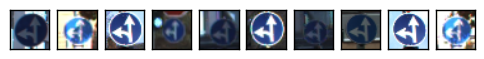

Class 38 "Keep right" has 2070 samples


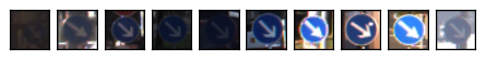

Class 39 "Keep left" has 300 samples


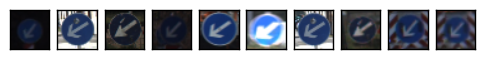

Class 40 "Roundabout mandatory" has 360 samples


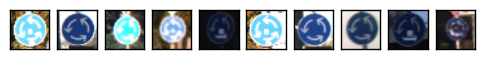

Class 41 "End of no passing" has 240 samples


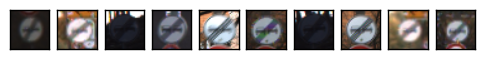

Class 42 "End of no passing by vehicles over 3.5 metric tons" has 240 samples


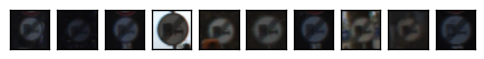

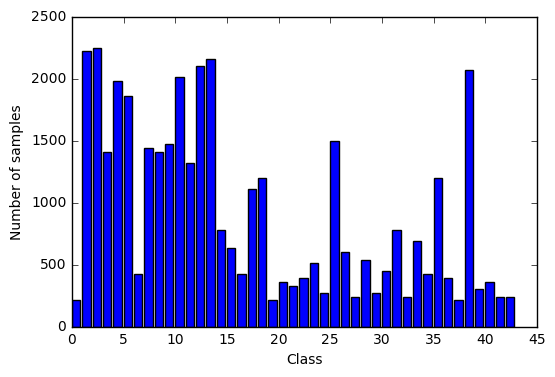

In [5]:
print_set_stats(X_train, y_train, True, True, 'Training data set stats')
#print_set_stats(X_test, y_test, True, True, '\nTest data set stats')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#???? do normalisation to 0-1 values?
#???? do image adjustments?

def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = np.rint(0.2989 * r + 0.5870 * g + 0.1140 * b)
    gray = gray.reshape(gray.shape + (1,)).astype(np.uint8) 
    return gray

def example_print(images, cmap = 'gray'):
    fig = plt.figure(figsize = (10, 1))
    count = len(images)
    for i in range(count):
        axis = fig.add_subplot(1, count, i + 1, xticks=[], yticks=[])
        axis.imshow(images[i].squeeze(), cmap=cmap)
    plt.show()

def image_adjust(images, use_CLAHE = False):
    if use_CLAHE:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for i in range(len(images)):
        if use_CLAHE:
            img = clahe.apply(images[i])
        else:
            img = cv2.equalizeHist(images[i])
        images[i] = img.reshape(img.shape + (1,)).astype(np.uint8) 
            
def preprocess_dataset(images, use_clahe):
    images = rgb2gray(images)
    image_adjust(images, use_clahe)
    #Scale to 0..1
    images = (images / 255.).astype(np.float32)
    return images

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I grayscale images and preprocessed them using Contrast Limited Adaptive histogram equalization (CLAHE). In my testing color didn't benefit recognition so I used grayscale images for speed. As images are taken in different lighting conditions they have different exposure levels. Signs could be over or under exposed. Same applies to the background\surrounding. CLAHE shows more even brightness results over other filters I checked.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=435128)

In [7]:
# DO TRAIN SET PREPROCESSING
#X_train_c = preprocess_dataset(X_train, True)
#X_train_n = preprocess_dataset(X_train, False)
X_train = preprocess_dataset(X_train, True)
X_valid = preprocess_dataset(X_valid, True)

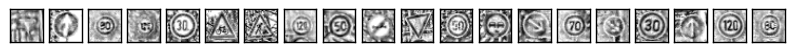

In [13]:
example_print(X_train[2450:2470,:,:,:])
#example_print(X_train_n[2450:2470,:,:,:])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I use train_test_split fuction from sklearn to split train set into train and validation sets. I chose validation set size as 20%. All sets are preprocessed by the same preprocess_dataset function.

In [8]:
import datetime

color_channel = 1
conv1_k = 5
conv1_f = 38
conv2_k = 5
conv2_f = 64
conv3_k = 3
conv3_f = 128
linear1_f = 300
linear2_f = n_classes
linear3_f = None

def file_namer(accuracy):
    name = 'Signs_conv_%i_%i' % (conv1_f, conv2_f)
    if conv3_f != None:
        name += '_' + str(conv3_f)
    name += '_linear' + str(linear1_f)
    if linear2_f != None:
        name += '_' + str(linear2_f)
    if linear3_f != None:
        name += '_' + str(linear3_f)
    if accuracy != None:
        name += '_acc_' + str(round(accuracy, 3))
    name += '.' + datetime.datetime.now().strftime("%Y%m%d.%H%M")
    name += '.ckpt'
    return name

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

import math

def maxpool2d(x, name, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME',
        name=name)

def conv2d(x, W, b, name, stride=1):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID',name=name)
    x = tf.nn.bias_add(x, b)
    #x = tf.nn.sigmoid(x)
    #x = tf.nn.relu(x)
    #x = tf.nn.tanh(x)
    return x

def linear(x, W, b, name):
    x = tf.add(tf.matmul(x, W), b, name=name+'_add')
    #x = tf.nn.sigmoid(x)
    #x = tf.nn.relu(x, name=name+'_relu')
    #x = tf.nn.tanh(x)
    return x

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
w_and_b = {
    'wconv1': tf.Variable(tf.truncated_normal([conv1_k, conv1_k, color_channel, conv1_f], mean=mu, stddev=sigma), name='wconv1'),
    'wconv2': tf.Variable(tf.truncated_normal([conv2_k, conv2_k, conv1_f, conv2_f], mean=mu, stddev=sigma), name='wconv2'),
    'wconv3': tf.Variable(tf.truncated_normal([conv3_k, conv3_k, conv2_f, conv3_f], mean=mu, stddev=sigma), name='wconv3'),
    'wlinear1': tf.Variable(tf.truncated_normal([3*3*conv3_f, linear1_f], mean=mu, stddev=sigma), name='wlinear1'),
    #'wlinear2': tf.Variable(tf.truncated_normal([linear1_out, linear2_out], mean=mu, stddev=sigma), name='wlinear2'),
    'wout': tf.Variable(tf.truncated_normal([linear1_f, n_classes], mean=mu, stddev=sigma), name='wout'),
    # BIASES
    'bconv1': tf.Variable(tf.zeros([conv1_f]), name='bconv1'),
    'bconv2': tf.Variable(tf.zeros([conv2_f]), name='bconv2'),
    'bconv3': tf.Variable(tf.zeros([conv3_f]), name='bconv3'),
    'blinear1': tf.Variable(tf.zeros([linear1_f]), name='blinear1'),
    #'blinear2': tf.Variable(tf.zeros([linear2_f]), name='blinear2'),
    'bout': tf.Variable(tf.zeros([n_classes]), name='bout')}
keep_prob = tf.placeholder(tf.float32)

def SignsClassifierNN(x):    
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    layer1 = conv2d(x, w_and_b['wconv1'], w_and_b['bconv1'], name='L1_Conv')
    #   Pooling. Input = 28x28x32. Output = 14x14x32.
    layer1 = maxpool2d(layer1, name='L1_MPool')
    layer1 = tf.nn.tanh(layer1)
                       
    # Layer 2: Convolutional. Output = 10x10x64.
    layer2 = conv2d(layer1, w_and_b['wconv2'], w_and_b['bconv2'], name='L2_Conv')
    #    Pooling. Input = 10x10x16. Output = 5x5x64.
    layer2 = maxpool2d(layer2, name='L2_MPool')
    layer2 = tf.nn.tanh(layer2)
    #layer2_lf = tf.contrib.layers.flatten(layer2) 
    
    # Layer 3: Convolutional. kernel = 3x3. Output = 3x3x128.
    layer3 = conv2d(layer2, w_and_b['wconv3'], w_and_b['bconv3'], name='L3_Conv')
    #layer3 = maxpool2d(layer3, name='L3_MPool')
    layer3 = tf.nn.tanh(layer3)
    #    Flatten. Input = 5x5x64. Output = 1600.
    
    layerf = tf.contrib.layers.flatten(layer3)  
    #layerf = tf.concat(1, [layer2_lf, layerf])
    
    # Fully Connected. Input = 1600. Output = 160.
    linear1 = linear(layerf, w_and_b['wlinear1'], w_and_b['blinear1'], name='L1_Linear')
    linear1 = tf.nn.tanh(linear1)
    
    #DROPOUT
    fc1_drop = tf.nn.dropout(linear1, keep_prob)
    
    # Fully Connected. Input = 160. Output = 86.
    #layer4 = linear(layer3, w_and_b['wl4'], w_and_b['bl4'], name='L2_Linear')
    
    #DROPOUT
    #keep_prob = tf.placeholder(tf.float32)
    #fc1_drop
                       
    # Layer 5: Fully Connected. Input = 86. Output = n_classes = 43.
    logits = linear(fc1_drop , w_and_b['wout'], w_and_b['bout'], name='LOut_Linear')
                       
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My architecure has 3 convolutional layers. 2 out of 3 convolutional layers use kernel of size 5 and max pooling with kernel size of 2. 3rd layer uses kernel of size 3 and no max pooling (as size of the dimensions of the layer is already 5x5) Feature sizes are 38, 64 and 128. Final convolution layer has dimensions of 3x3x128. After that I flatten output and use linear classifier with output of 300 and dropout. Then final linear classifier is used to map neural network to 43 classes. 
For all layers tanh is used as activation function.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128 #256 #128
checkpoints_to_keep = 8

x = tf.placeholder(tf.float32, (None, 32, 32, color_channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline
rate = 0.001

logits = SignsClassifierNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + \
    0.0001*tf.nn.l2_loss(w_and_b['wlinear1'])  + \
    0.0001*tf.nn.l2_loss(w_and_b['wout'])
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Evaluation model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver( max_to_keep=checkpoints_to_keep)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


predictions = tf.nn.softmax(logits)
top_k_predictions = tf.nn.top_k(predictions, 3)

def get_top_k_predictions(X):
    sess = tf.get_default_session()
    p = sess.run(top_k_predictions, feed_dict = {x: X, keep_prob: 1.0})
    return np.array(p)

In [11]:
# TRAINing module
from sklearn.utils import shuffle

temp_file = work_dir + '\\tmp.ckpt'

validation_accuracy = 0
vars_file_name = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    max_validation_accuracy = .0
    max_validation_epoch = 99
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver.restore(sess, 'C:\\temp\\tmp.ckpt-5')
    #saver.restore(sess, 'F:\dima\SDC\code\CarND-Traffic-Sign-Classifier-Project)\CarND-Traffic-Sign-Classifier-Project\Signs_conv_32_64_128_linear1024_43_acc_0.992.ckpt')
    num_examples = len(X_train)
    print("Training on %i examples" % (num_examples) )
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)

        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        if validation_accuracy < max_validation_accuracy and \
            (i-checkpoints_to_keep == max_validation_epoch  # we are about to overwrite best checkpoint > restore to it and stop
            or i == EPOCHS-1 ): # we are on last epoch but one of the previous checkpoints was better
            #stop epochs and restore better value
            print("Stop and fallback to vars saved on epoch #%i with validation acc = %.3f" % (max_validation_epoch, max_validation_accuracy))
            saver.restore(sess, temp_file + '-' + str(max_validation_epoch))
            break
        if validation_accuracy >= max_validation_accuracy:
            max_validation_accuracy = validation_accuracy
            max_validation_epoch = i
            print('New max val acc: %.6f @ epoch %i' % (max_validation_accuracy, max_validation_epoch))
            print()
        tmp_save_file = saver.save(sess, temp_file, global_step=i)
        
    vars_file_name = saver.save(sess, work_dir + '\\' + file_namer(max_validation_accuracy))
    print("Model saved to %s" % (vars_file_name))

Training on 31367 examples
EPOCH 0 ...
Validation Accuracy = 0.955
Train Accuracy = 0.967

New max val acc: 0.955113 @ epoch 0

EPOCH 1 ...
Validation Accuracy = 0.978
Train Accuracy = 0.988

New max val acc: 0.978067 @ epoch 1

EPOCH 2 ...
Validation Accuracy = 0.984
Train Accuracy = 0.995

New max val acc: 0.983805 @ epoch 2

EPOCH 3 ...
Validation Accuracy = 0.987
Train Accuracy = 0.998

New max val acc: 0.986866 @ epoch 3

EPOCH 4 ...
Validation Accuracy = 0.990
Train Accuracy = 1.000

New max val acc: 0.989926 @ epoch 4

EPOCH 5 ...
Validation Accuracy = 0.990
Train Accuracy = 1.000

New max val acc: 0.990309 @ epoch 5

EPOCH 6 ...
Validation Accuracy = 0.989
Train Accuracy = 1.000

EPOCH 7 ...
Validation Accuracy = 0.991
Train Accuracy = 1.000

New max val acc: 0.990691 @ epoch 7

EPOCH 8 ...
Validation Accuracy = 0.992
Train Accuracy = 1.000

New max val acc: 0.991711 @ epoch 8

EPOCH 9 ...
Validation Accuracy = 0.991
Train Accuracy = 1.000

EPOCH 10 ...
Validation Accuracy = 0.

In [11]:
# do test set processing
X_test_gr = preprocess_dataset(X_test, True)
#vars_file_name = 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\Signs_conv_38_64_128_linear300_43_acc_0.996.20170206.1524.ckpt'

In [12]:
# Test model
print('Test model on test set')
vars_file_name = 'D:\_study\SDC\Code\CarND-Traffic-Sign-Classifier-Project\Signs_conv_38_64_128_linear300_43_acc_0.996.20170206.1524.ckpt'
with tf.Session() as sess:
    #saver.restore(sess, 'F:\dima\SDC\code\CarND-Traffic-Sign-Classifier-Project)\CarND-Traffic-Sign-Classifier-Project\Signs_conv_32_64_128_linear1024_43_acc_0.992.ckpt')
    saver.restore(sess, vars_file_name)
    #saver.restore(sess,work_dir + '\\tmp.ckpt-24')
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_gr, y_test)
    print('Test accuracy = {:.3f}'.format(test_accuracy))
    print()

Test model on test set
Test accuracy = 0.972



In [103]:
def DisplayImagesWithPredictions(imgs, top_k, top_k_perc, number, images_in_row = 10):
    if number != None and number != 0:
        fig = plt.figure(figsize = (images_in_row, math.ceil(number/10)))      
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1.1, hspace=0.25, wspace=0.25)
        for i in range(np.minimum(number, len(imgs))):
            axis = fig.add_subplot(math.ceil(number/10), images_in_row, i + 1, xticks=[], yticks=[])
            axis.imshow(imgs[i].squeeze(), cmap = 'gray')
            axis.text(-4,-7, '%-18.18s %.2f' % (signs_dict[str(top_k[i,0])] , top_k_perc[i,0]), size ='xx-small')
            axis.text(-4,-4, '%-18.18s %.2f' % (signs_dict[str(top_k[i,1])] , top_k_perc[i,1]), size ='xx-small')
            axis.text(-4,-1, '%-18.18s %.2f' % (signs_dict[str(top_k[i,2])] , top_k_perc[i,2]), size ='xx-small')
            
            #axis.text(-4,-1,signs_dict[str(top_k[i,2])][0:20], size ='xx-small')
            
def DisplayWrongPredictionStats(X, y, vars_file, signs_to_display=None):
    with tf.Session() as sess:
        saver.restore(sess, vars_file)
        predictions = get_top_k_predictions(X)
        guessed_wrong_filter = y != predictions[1,:,0].astype(int)
        
        prediction_top_k_labels = predictions[1,:,:].astype(int)[guessed_wrong_filter]
        prediction_top_k_perc = predictions[0,:,:][guessed_wrong_filter]
        test_imgs_guessed_wrong = X[guessed_wrong_filter]
        test_lbls_guessed_wrong = y[guessed_wrong_filter]
        #print(len(test_lbls_guessed_wrong))
        #print(test_lbls_guessed_wrong)
        
        wl_ids, wrong_labels_count = np.unique(test_lbls_guessed_wrong, return_counts=True)
        _, test_labels_count = np.unique(y_test, return_counts=True)
        _, train_labels_count = np.unique(y_train, return_counts=True)
        for i, wlc in zip(wl_ids, wrong_labels_count):
            print('Sign #%02d %-40.40s: wrong=%3d, test=%4d, train=%4d, tst/train=%3d%%, w/tst=%3d%%'
                  % (i, '"'+signs_dict[str(i)]+'"', wlc, test_labels_count[i], train_labels_count[i], test_labels_count[i]/train_labels_count[i]*100, wlc/test_labels_count[i]*100))
        
        DisplayImagesWithPredictions(test_imgs_guessed_wrong, prediction_top_k_labels, prediction_top_k_perc, signs_to_display)

        
def DisplaySignTypeWithPrediction(X, vars_file, type_id=None, signs_to_display=None):
    with tf.Session() as sess:
        saver.restore(sess, vars_file)
        predictions = get_top_k_predictions(X)
        if type_id == None :
            type_filter = np.ones_like(X[:,0,0,0], dtype=bool)
        else:
            type_filter = X[:,0,0,0] == type_id
        prediction_top_k_labels = predictions[1,:,:].astype(int)[type_filter]
        prediction_top_k_perc = predictions[0,:,:][type_filter]
        images_to_display = X[type_filter]
        
        DisplayImagesWithPredictions(images_to_display, prediction_top_k_labels, prediction_top_k_perc, signs_to_display)

Top incorrect prediction ------------------------------------

Test set:
Sign #00 "Speed limit (20km/h)"                  : wrong=  1, test=  60, train= 156, tst/train= 38%, w/tst=  1%
Sign #01 "Speed limit (30km/h)"                  : wrong= 12, test= 720, train=1776, tst/train= 40%, w/tst=  1%
Sign #02 "Speed limit (50km/h)"                  : wrong=  4, test= 750, train=1805, tst/train= 41%, w/tst=  0%
Sign #03 "Speed limit (60km/h)"                  : wrong= 30, test= 450, train=1098, tst/train= 40%, w/tst=  6%
Sign #04 "Speed limit (70km/h)"                  : wrong= 11, test= 660, train=1608, tst/train= 41%, w/tst=  1%
Sign #05 "Speed limit (80km/h)"                  : wrong=  4, test= 630, train=1490, tst/train= 42%, w/tst=  0%
Sign #06 "End of limit (80km/h)"                 : wrong= 11, test= 150, train= 336, tst/train= 44%, w/tst=  7%
Sign #07 "Speed limit (100km/h)"                 : wrong= 10, test= 450, train=1140, tst/train= 39%, w/tst=  2%
Sign #08 "Speed limit (120km/h)

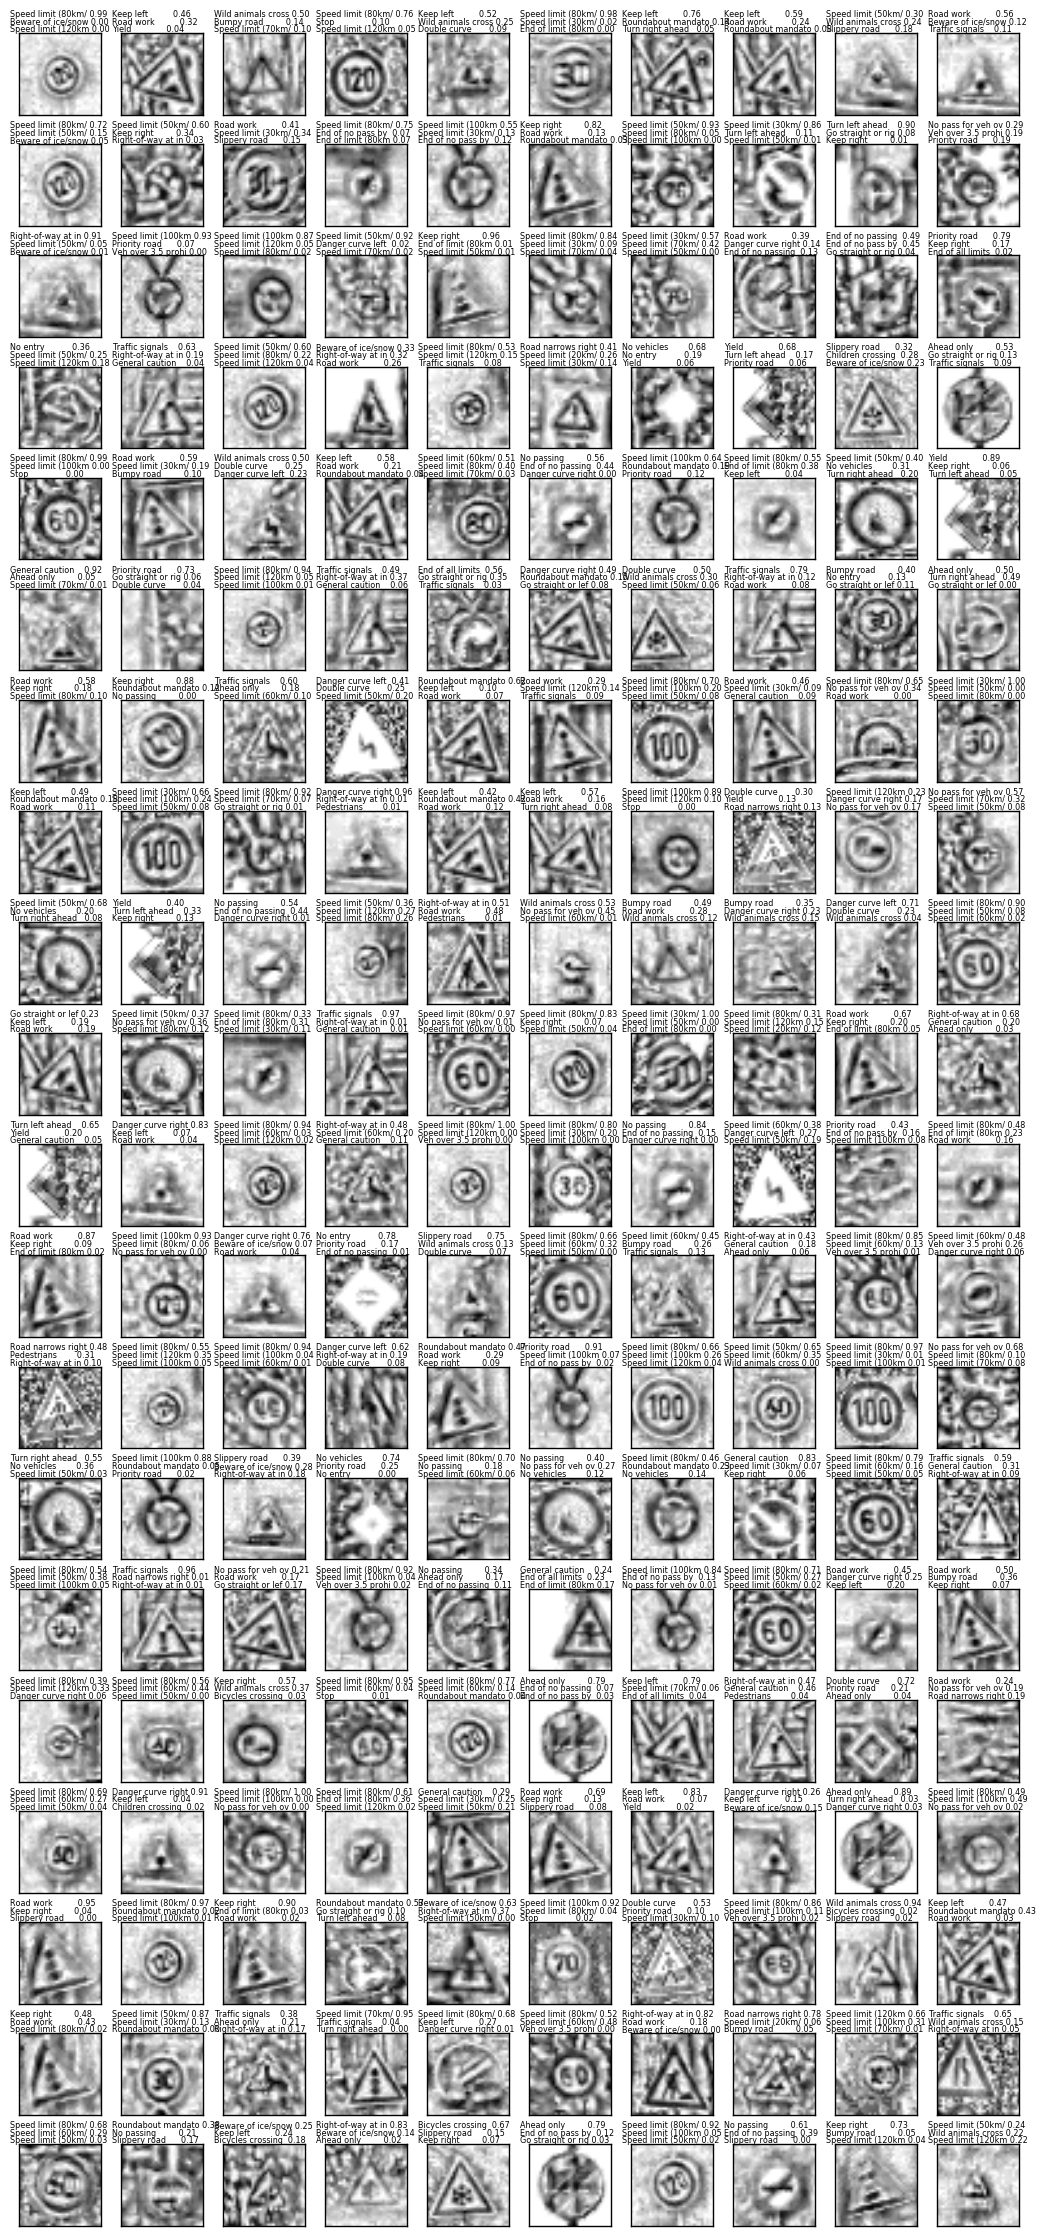

In [129]:
print('Top incorrect prediction ------------------------------------')
#print()
#print('Validations set:')
#DisplayWrongPredictionStats(X_valid, y_valid, vars_file_name, 50)
print()
print('Test set:')
DisplayWrongPredictionStats(X_test_gr, y_test, vars_file_name, 200)

In [ ]:
DisplaySignTypeWithPrediction(X_test_gr, vars_file_name, 30, 300)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used Adam Optimizer as adviced from the lectures. Weights where initialized with truncated normal distribution with mean 0 and standrat deviation of 0.1. Biases are initialized as 0.

I used learing rate of 0.001 and l2 regularization factor of 0.0001.
Batch size was 128. And I used early stopping with max epochs of 50 and rollback to epoch with larges validation accuracy if it didn't improve over 8 epochs.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started from LeNet architerture and added more convolutions. As image size is bigger and so is the amount of details on the images.
Architectures with more features or with previous convolutions connected to linear classifier didn't result in better accuracy and took significant time to train. I expect that better results could be acheive with more complex network. This may require data set augmentation as current dataset has havily underrepresented classes which tend to have less prediction accuracy in the result.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [71]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

dir_name = 'italian_signs/'
image_file_names_array =  os.listdir(dir_name)
imported_images = np.array([np.array(mpimg.imread(dir_name+fname)) for fname in image_file_names_array])

X_imported = preprocess_dataset(imported_images, True)


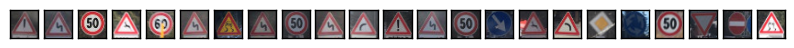

In [133]:
example_print(imported_images)


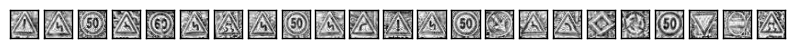

In [73]:
example_print(X_imported)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



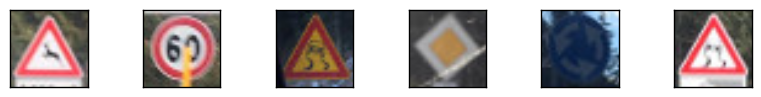

In [146]:
#example_print(imported_images[False, False, False, True, True, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False , True])
example_print(imported_images[np.array([False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False , True])])

**Answer:** 
1. Blurry 
2. Object infront of the image 
3. Different color then on the training set
4. Blurry and with dirty line on a car window
5. Dark
6. Blurry


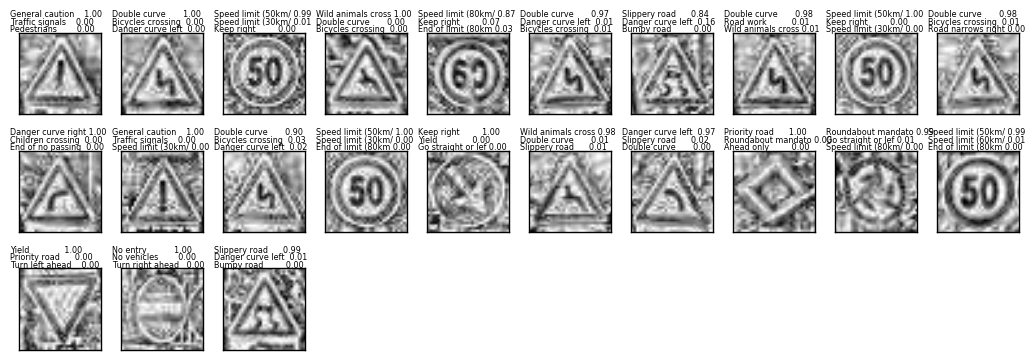

In [112]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

DisplaySignTypeWithPrediction(X_imported, vars_file_name, type_id = None, signs_to_display = len(X_imported))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Trained network was able to predict 22 out of 23 signs correctly. That is 96% accuracy. Surprisingly it failed on "60 limit" sign that is partialy covered.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

Top K predictions on additional images:

Prediction0 as #18 "General caution"         with 0.9996 certainty
Prediction1 as #26 "Traffic signals"         with 0.0002 certainty
Prediction2 as #27 "Pedestrians"             with 0.0001 certainty


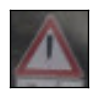

Prediction0 as #21 "Double curve"            with 0.9959 certainty
Prediction1 as #29 "Bicycles crossing"       with 0.0036 certainty
Prediction2 as #19 "Danger curve left"       with 0.0001 certainty


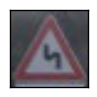

Prediction0 as # 2 "Speed limit (50km/h)"    with 0.9873 certainty
Prediction1 as # 1 "Speed limit (30km/h)"    with 0.0058 certainty
Prediction2 as #38 "Keep right"              with 0.0044 certainty


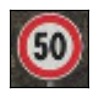

Prediction0 as #31 "Wild animals crossing"   with 0.9998 certainty
Prediction1 as #21 "Double curve"            with 0.0002 certainty
Prediction2 as #29 "Bicycles crossing"       with 0.0000 certainty


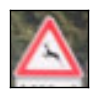

Prediction0 as # 5 "Speed limit (80km/h)"    with 0.8652 certainty
Prediction1 as #38 "Keep right"              with 0.0709 certainty
Prediction2 as # 6 "End of limit (80km/h)"   with 0.0266 certainty


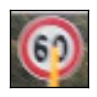

Prediction0 as #21 "Double curve"            with 0.9742 certainty
Prediction1 as #19 "Danger curve left"       with 0.0123 certainty
Prediction2 as #29 "Bicycles crossing"       with 0.0079 certainty


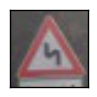

Prediction0 as #23 "Slippery road"           with 0.8365 certainty
Prediction1 as #19 "Danger curve left"       with 0.1568 certainty
Prediction2 as #22 "Bumpy road"              with 0.0023 certainty


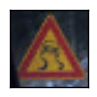

Prediction0 as #21 "Double curve"            with 0.9819 certainty
Prediction1 as #25 "Road work"               with 0.0062 certainty
Prediction2 as #31 "Wild animals crossing"   with 0.0055 certainty


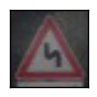

Prediction0 as # 2 "Speed limit (50km/h)"    with 0.9994 certainty
Prediction1 as #38 "Keep right"              with 0.0003 certainty
Prediction2 as # 1 "Speed limit (30km/h)"    with 0.0002 certainty


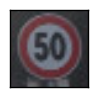

Prediction0 as #21 "Double curve"            with 0.9848 certainty
Prediction1 as #29 "Bicycles crossing"       with 0.0065 certainty
Prediction2 as #24 "Road narrows right"      with 0.0045 certainty


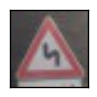

Prediction0 as #20 "Danger curve right"      with 0.9982 certainty
Prediction1 as #28 "Children crossing"       with 0.0011 certainty
Prediction2 as #41 "End of no passing"       with 0.0003 certainty


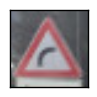

Prediction0 as #18 "General caution"         with 1.0000 certainty
Prediction1 as #26 "Traffic signals"         with 0.0000 certainty
Prediction2 as # 1 "Speed limit (30km/h)"    with 0.0000 certainty


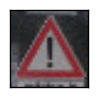

Prediction0 as #21 "Double curve"            with 0.9004 certainty
Prediction1 as #29 "Bicycles crossing"       with 0.0290 certainty
Prediction2 as #19 "Danger curve left"       with 0.0170 certainty


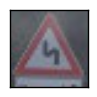

Prediction0 as # 2 "Speed limit (50km/h)"    with 1.0000 certainty
Prediction1 as # 1 "Speed limit (30km/h)"    with 0.0000 certainty
Prediction2 as # 6 "End of limit (80km/h)"   with 0.0000 certainty


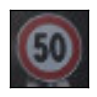

Prediction0 as #38 "Keep right"              with 0.9972 certainty
Prediction1 as #13 "Yield"                   with 0.0011 certainty
Prediction2 as #37 "Go straight or left"     with 0.0005 certainty


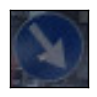

Prediction0 as #31 "Wild animals crossing"   with 0.9803 certainty
Prediction1 as #21 "Double curve"            with 0.0089 certainty
Prediction2 as #23 "Slippery road"           with 0.0057 certainty


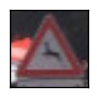

Prediction0 as #19 "Danger curve left"       with 0.9740 certainty
Prediction1 as #23 "Slippery road"           with 0.0233 certainty
Prediction2 as #21 "Double curve"            with 0.0009 certainty


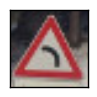

Prediction0 as #12 "Priority road"           with 1.0000 certainty
Prediction1 as #40 "Roundabout mandatory"    with 0.0000 certainty
Prediction2 as #35 "Ahead only"              with 0.0000 certainty


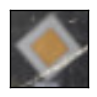

Prediction0 as #40 "Roundabout mandatory"    with 0.9885 certainty
Prediction1 as #37 "Go straight or left"     with 0.0067 certainty
Prediction2 as # 5 "Speed limit (80km/h)"    with 0.0023 certainty


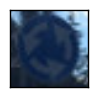

Prediction0 as # 2 "Speed limit (50km/h)"    with 0.9883 certainty
Prediction1 as # 3 "Speed limit (60km/h)"    with 0.0063 certainty
Prediction2 as # 6 "End of limit (80km/h)"   with 0.0033 certainty


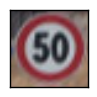

Prediction0 as #13 "Yield"                   with 1.0000 certainty
Prediction1 as #12 "Priority road"           with 0.0000 certainty
Prediction2 as #34 "Turn left ahead"         with 0.0000 certainty


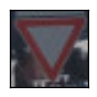

Prediction0 as #17 "No entry"                with 0.9999 certainty
Prediction1 as #15 "No vehicles"             with 0.0001 certainty
Prediction2 as #33 "Turn right ahead"        with 0.0000 certainty


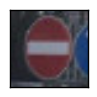

Prediction0 as #23 "Slippery road"           with 0.9859 certainty
Prediction1 as #19 "Danger curve left"       with 0.0080 certainty
Prediction2 as #22 "Bumpy road"              with 0.0042 certainty


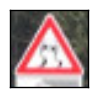

In [128]:
def DisplayPredictionWithDetails(X, vars_file):
    X_preprocessed = preprocess_dataset(X, True)
        
    with tf.Session() as sess:
        saver.restore(sess, vars_file)
        predictions = get_top_k_predictions(X_preprocessed)
        k = len(predictions[0,0])
        prediction_top_k_labels = predictions[1,:,:].astype(int)
        prediction_top_k_perc = predictions[0,:,:]
        for i in range(len(X)):
            for j in range(k):
                print('Prediction%d as #%2d %-25.25s with %.4f certainty' 
                      % (j,
                         prediction_top_k_labels[i, j],
                         '"'+signs_dict[str(prediction_top_k_labels[i, j])] +'"',
                         prediction_top_k_perc[i, j]))
            fig = plt.figure(figsize = (1,1))
            axis = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
            axis.imshow(X[i].squeeze())
            plt.show()

print('Top K predictions on additional images:')
print()
DisplayPredictionWithDetails(imported_images, vars_file_name)  

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Model is very certain about all predictions. Except the only one guessed wrong that is still have very high certainty. Unfortunately correct prediction didn't appear in top 3

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.